In [1]:
# library for data handling
import numpy as np 
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px

#
from sklearn.cluster import KMeans
from sklearn import preprocessing


/kaggle/input/goodreads-reading-list/Books_That_Everyone_Should_Read_At_Least_Once1.csv


In [2]:
df = pd.read_csv("/kaggle/input/goodreads-reading-list/Books_That_Everyone_Should_Read_At_Least_Once1.csv", index_col = False)

In [3]:
df.head()

,title,author,avg_rating,total_ratings
0,To Kill a Mockingbird,Harper Lee,4.27,"5,260,972"
1,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,4.48,"8,496,025"
2,Pride and Prejudice,Jane Austen,4.28,"3,595,947"
3,The Diary of a Young Girl,Anne Frank,4.17,"3,236,081"
4,Animal Farm,George Orwell,3.97,"3,260,451"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4900 entries, 0 to 4899
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          4900 non-null   object
 1   author         4900 non-null   object
 2   avg_rating     4900 non-null   object
 3   total_ratings  4900 non-null   object
dtypes: object(4)
memory usage: 153.2+ KB


In [5]:
df["avg_rating"].unique()

array(['4.27', '4.48', '4.28', '4.17', '3.97', '4.19', '4.32', '3.93',
       '3.81', '4.51', '4.38', '4.14', '4.26', '3.69', '3.75', '4.62',
       '4.13', '4.37', '4.12', '3.88', '3.98', '4.30', '4.58', '4.06',
       '4.10', '4.35', '4.57', '4.42', '4.22', '4.03', '3.82', '3.90',
       '4.24', '4.46', '4.23', '3.79', '4.07', '4.11', '4.25', '4.40',
       '3.99', '4.31', '3.92', '3.86', '4.20', '3.84', '4.34', '4.09',
       '3.43', '3.63', '4.05', 'really', '4.29', '4.43', '4.02', '3.89',
       '4.08', '3.52', '4.01', '4.16', '4.33', '4.39', '4.18', '4.36',
       '4.45', '4.44', '4.15', '3.83', '3.96', '4.55', '3.95', '3.85',
       '3.87', '3.60', '4.49', '3.62', '4.60', '3.58', '3.78', '3.68',
       '3.77', '3.91', '4.52', '3.66', '4.64', '4.21', '4.95', '4.04',
       '3.71', '3.59', '3.80', '3.74', '3.72', '3.76', '3.64', '4.50',
       '3.57', '4.47', '4.41', '3.55', '3.54', '3.46', '3.67', '4.59',
       '3.94', '3.51', '4.73', '3.70', '4.54', '3.42', '3.50', '3.61',
    

In [6]:
df.drop(df[df["avg_rating"]=="really"].index, axis =0, inplace = True)
df.drop(df[df["avg_rating"]=="it"].index, axis =0, inplace = True)
df.drop(df[df["avg_rating"]=="liked"].index, axis =0, inplace = True)


In [7]:
df["avg_rating"] = df["avg_rating"].str.replace(",","").astype(float)
df["total_ratings"] = df["total_ratings"].str.replace(",","").astype(int)

In [8]:
df.describe()

,avg_rating,total_ratings
count,4827.000000,4.827000e+03
mean,4.055297,1.452168e+05
std,0.277496,4.070778e+05
min,0.000000,0.000000e+00
25%,3.890000,7.373000e+03
50%,4.070000,3.868400e+04
75%,4.240000,1.203630e+05
max,4.950000,8.496025e+06


In [9]:
ratings = df[["avg_rating","total_ratings"]]
kmeans = KMeans(4)
kmeans.fit(ratings)

clusters = kmeans.fit_predict(ratings)
clusters[:5]

array([3, 3, 1, 1, 1], dtype=int32)

In [10]:
data_cluster = df.copy()
data_cluster["group"] = clusters
data_cluster.head()

,title,author,avg_rating,total_ratings,group
0,To Kill a Mockingbird,Harper Lee,4.27,5260972,3
1,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,4.48,8496025,3
2,Pride and Prejudice,Jane Austen,4.28,3595947,1
3,The Diary of a Young Girl,Anne Frank,4.17,3236081,1
4,Animal Farm,George Orwell,3.97,3260451,1


In [11]:
wcss = []

for i in range (1, 10):
    kmeans = KMeans(i)
    kmeans.fit(ratings)
    wcss_result = kmeans.inertia_
    wcss.append(wcss_result)

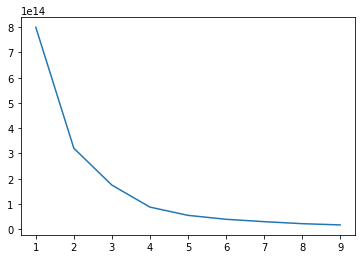

In [12]:
number_clusters = range (1,10)
plt.plot(number_clusters, wcss)